# FOV coordinate checks for HAP-HD

Some quick FOV coordinate checks for HAP-HD.

See https://github.com/gammasky/hess-host-analyses/issues/12

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from astropy.table import Table
table = Table.read('run_0018406_std_fullEnclosure_eventlist.fits', hdu='EVENTS')

In [3]:
table.info('stats')

<Table length=8928>
      name           mean           std            min           max     
--------------- -------------- -------------- ------------- -------------
       EVENT_ID  1633.79278674   5095.1758916             1        345378
       BUNCH_ID  80.5175851254  45.5249218337             1           159
         OBS_ID        18406.0            0.0         18406         18406
           TIME  127987333.933  457.017012376 127986538.643 127988124.392
         MULTIP  2.54782706093 0.764757575512             2             4
        TELMASK 0.636956765233 0.480877161505         False          True
             RA        83.6815        1.71395        52.989       106.497
            DEC        24.4608         1.5983      -8.10739          41.7
        DIR_ERR            0.0            0.0           0.0           0.0
     SKYX_RADEC      0.0405274        1.61687      -17.7295       38.5221
     SKYY_RADEC      0.0442747        1.60082      -40.3573       22.9085
           DETX   

/Users/deil/Library/Python/3.5/lib/python/site-packages/astropy-1.2.dev14867-py3.5-macosx-10.11-x86_64.egg/astropy/table/column.py:263: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)


(-1, 1)

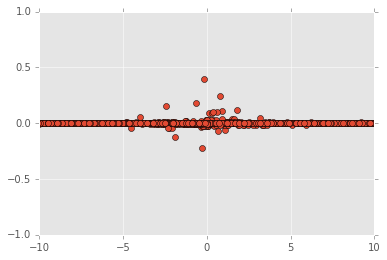

In [4]:
plt.plot(np.tan(table['FOV_RADEC_LON']), table['SKYY_RADEC'] - table['FOV_RADEC_LON'], 'o')
plt.xlim(-10, 10)
plt.ylim(-1, 1)